In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})
area = meshmask.e1t[0] * meshmask.e2t[0]

In [3]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')

In [14]:
alkalinity_run_may_01 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/01may21/SalishSea_1h_20210501_20210501_chem_T.nc')
alkalinity_run_may_03 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/03may21/SalishSea_1h_20210503_20210503_chem_T.nc')
alkalinity_run_may_06 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/06may21/SalishSea_1h_20210506_20210506_chem_T.nc')
alkalinity_run_may_16 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/16may21/SalishSea_1h_20210516_20210516_chem_T.nc')
alkalinity_run_may_31 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/31may21/SalishSea_1h_20210531_20210531_chem_T.nc')
alkalinity_run_may_01

<xarray.Dataset>
Dimensions:                     (y: 898, x: 398, nvertex: 4, deptht: 40,
                                 axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat                     (y, x) float32 ...
    nav_lon                     (y, x) float32 ...
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered               (time_counter) datetime64[ns] ...
  * time_counter                (time_counter) datetime64[ns] 2021-05-01T00:3...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon              (y, x, nvertex) float32 ...
    bounds_nav_lat              (y, x, nvertex) float32 ...
    area                        (y, x) float32 ...
    deptht_bounds               (deptht, axis_nbounds) float32 ...
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] ...
    PAR                         (time_counter, deptht, y, x) float32 ...
    turbidity                   (time_counter, deptht, y, x) float32 ...
    dissolved_inorganic_carbon  (time_counter, deptht, y, x) float32 ...
    total_alkalinity            (time_counter, deptht, y, x) float32 ...
    dissolved_oxygen            (time_counter, deptht, y, x) float32 ...
    CO2_flux                    (time_counter, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20210501_20210531_chem_T
    description:  chemistry and light
    title:        chemistry and light
    Conventions:  CF-1.6
    timeStamp:    2023-Dec-03 21:11:48 GMT
    uuid:         73af0f2a-dbdf-4d83-9a75-ba23e1d34336

In [15]:
long_run_may_01 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/01may18/SalishSea_1h_20180501_20180501_chem_T.nc')
long_run_may_03 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/03may18/SalishSea_1h_20180503_20180503_chem_T.nc')
long_run_may_06 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/06may18/SalishSea_1h_20180506_20180506_chem_T.nc')
long_run_may_16 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/16may18/SalishSea_1h_20180516_20180516_chem_T.nc')
long_run_may_31 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/31may18/SalishSea_1h_20180531_20180531_chem_T.nc')
long_run_may_01

<xarray.Dataset>
Dimensions:                     (y: 898, x: 398, nvertex: 4, deptht: 40,
                                 axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat                     (y, x) float32 ...
    nav_lon                     (y, x) float32 ...
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered               (time_counter) datetime64[ns] ...
  * time_counter                (time_counter) datetime64[ns] 2018-05-01T00:3...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon              (y, x, nvertex) float32 ...
    bounds_nav_lat              (y, x, nvertex) float32 ...
    area                        (y, x) float32 ...
    deptht_bounds               (deptht, axis_nbounds) float32 ...
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] ...
    PAR                         (time_counter, deptht, y, x) float32 ...
    turbidity                   (time_counter, deptht, y, x) float32 ...
    dissolved_inorganic_carbon  (time_counter, deptht, y, x) float32 ...
    total_alkalinity            (time_counter, deptht, y, x) float32 ...
    dissolved_oxygen            (time_counter, deptht, y, x) float32 ...
    CO2_flux                    (time_counter, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20180501_20180531_chem_T
    description:  chemistry and light
    title:        chemistry and light
    Conventions:  CF-1.6
    timeStamp:    2023-Oct-22 19:18:05 GMT
    uuid:         81a3e4fd-264c-45f6-bd60-e7a280e31dc6

In [33]:
diff_may_01 = long_run_may_01['total_alkalinity'].isel(time_counter = 2, deptht = 23) - alkalinity_run_may_01['total_alkalinity'].isel(time_counter = 2, deptht = 23)

In [66]:
def planview(base, new, field, it, ide, dvmax):
    fig, axs = plt.subplots(1, 1, figsize=(6, 4))
    iz = 30  # width of domain plotted
    
    (new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]-
     base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]).where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]
     ).plot(ax=axs, cmap=cm_bwr, vmax=dvmax, vmin=-dvmax)
    axs.set_title(f'Difference (New-Base) {field} at {it}:30')
    axs.set_xlabel('x')
    axs.set_ylabel('y')

    axs.scatter(304 - 280, 446 - 430, marker = 'x', color = 'g')
    axs.scatter(304 - 280, 447 - 430, marker = 'x', color = 'g')
    axs.scatter(305 - 280, 446 - 430, marker = 'x', color = 'g')
    axs.scatter(305 - 280, 447 - 430, marker = 'x', color = 'g')

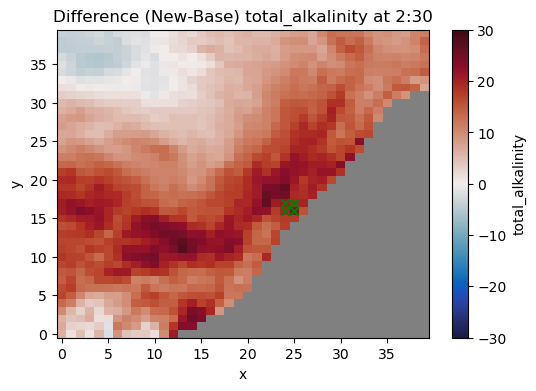

In [86]:
planview(long_run_may_01, alkalinity_run_may_01, 'total_alkalinity', 2, 23, 30)

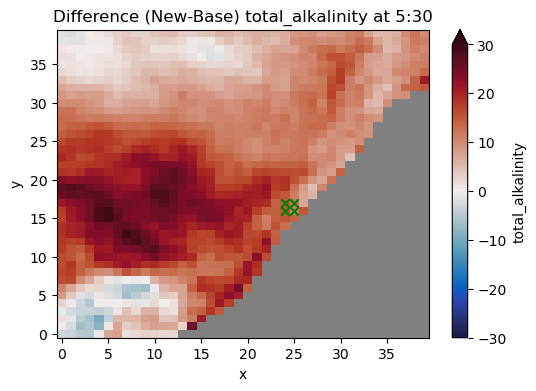

In [85]:
planview(long_run_may_01, alkalinity_run_may_01, 'total_alkalinity', 5, 23, 30)

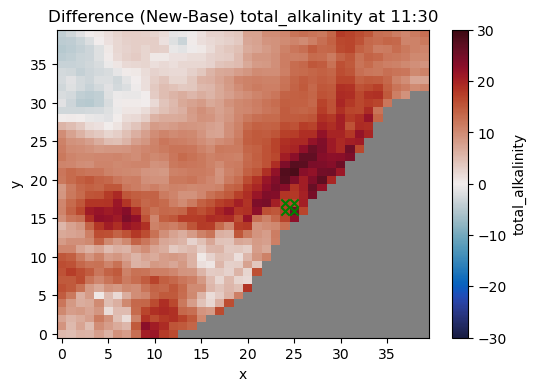

In [84]:
planview(long_run_may_01, alkalinity_run_may_01, 'total_alkalinity', 11, 23, 30)

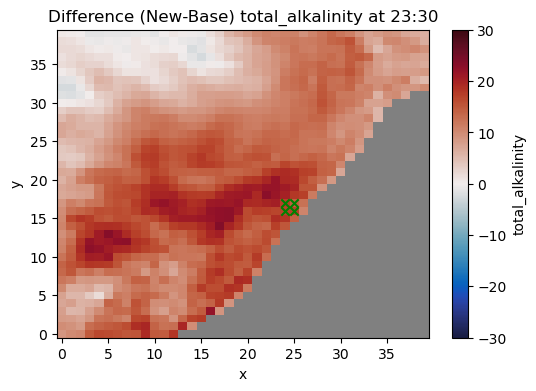

In [83]:
planview(long_run_may_01, alkalinity_run_may_01, 'total_alkalinity', 23, 23, 30)

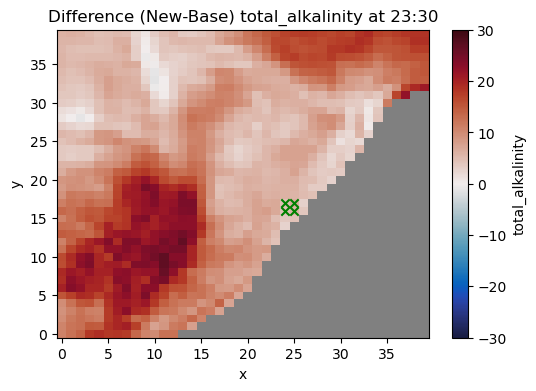

In [82]:
planview(long_run_may_03, alkalinity_run_may_03, 'total_alkalinity', 23, 23, 30)

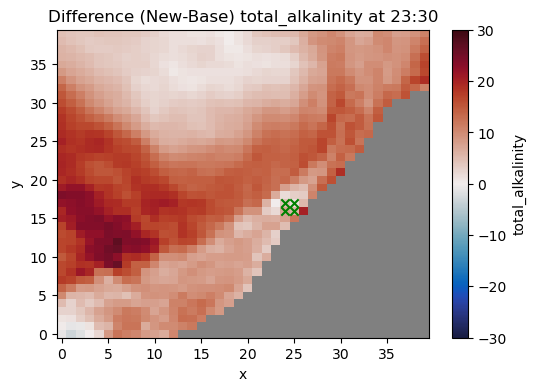

In [81]:
planview(long_run_may_06, alkalinity_run_may_06, 'total_alkalinity', 23, 23, 30)

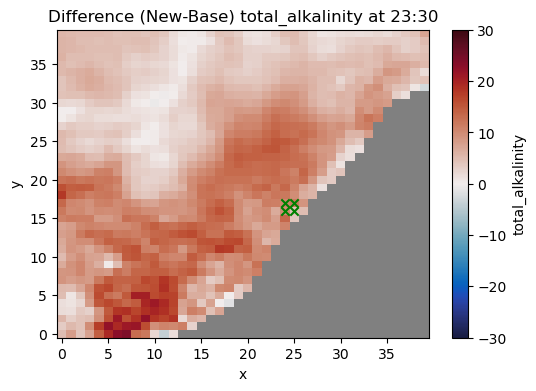

In [80]:
planview(long_run_may_16, alkalinity_run_may_16, 'total_alkalinity', 23, 23, 30)

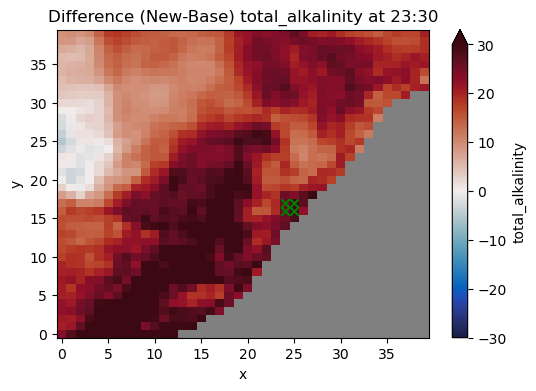

In [79]:
planview(long_run_may_31, alkalinity_run_may_31, 'total_alkalinity', 23, 23, 30)

In [91]:
def verticalview(base, new, field, it, dep, dvmax):
    fig, axs = plt.subplots(1, 1, figsize=(6, 4))
    iz = 30  # width of domain plotted
    (new[field][it, :, dep, 250+iz:350-iz]-
     base[field][it, :, dep, 250+iz:350-iz]).where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs, cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs.set_title(f'Difference (New-Base) {field} at {it}:30')

    fig.suptitle(f'Vertical view at y = {dep}')

    if dep == 446:
     axs.scatter(304 - 280, 98, marker = 'x', color = 'g')
     axs.scatter(305 - 280, 76, marker = 'x', color = 'g')
    else:

     axs.scatter(304 - 280, 121, marker = 'x', color = 'g')
     axs.scatter(305 - 280, 98, marker = 'x', color = 'g')

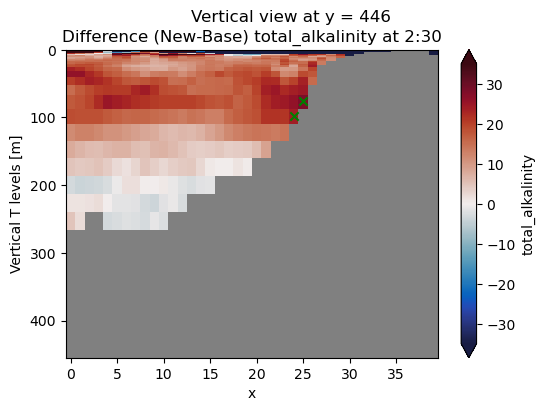

In [96]:
verticalview(long_run_may_01, alkalinity_run_may_01, 'total_alkalinity', 2, 446, 35)

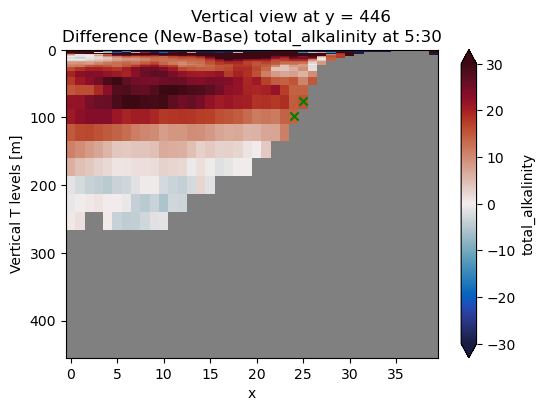

In [98]:
verticalview(long_run_may_01, alkalinity_run_may_01, 'total_alkalinity', 5, 446, 30)

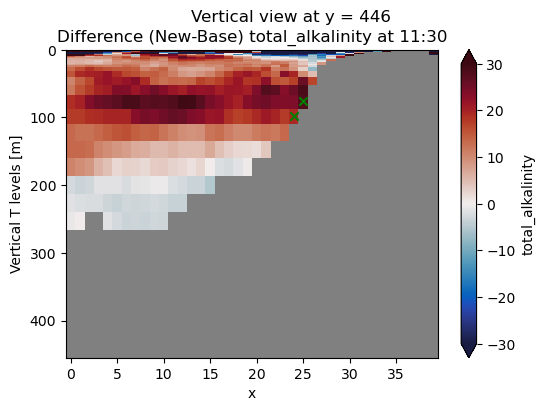

In [99]:
verticalview(long_run_may_01, alkalinity_run_may_01, 'total_alkalinity', 11, 446, 30)

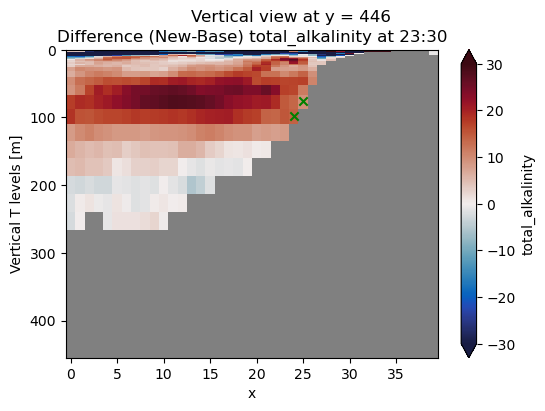

In [100]:
verticalview(long_run_may_01, alkalinity_run_may_01, 'total_alkalinity', 23, 446, 30)

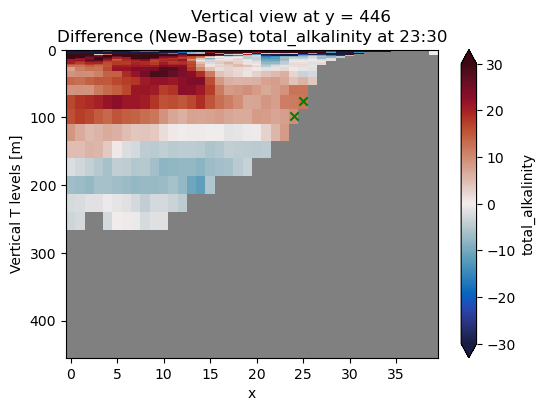

In [101]:
verticalview(long_run_may_03, alkalinity_run_may_03, 'total_alkalinity', 23, 446, 30)

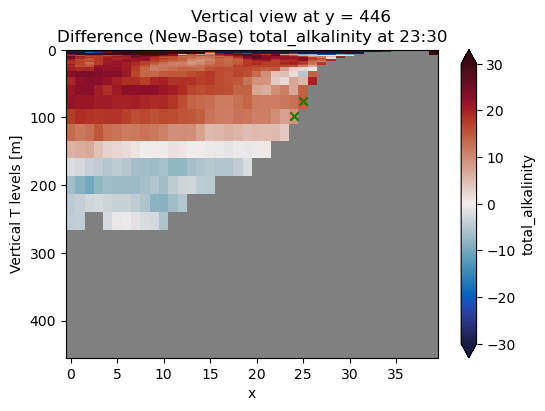

In [102]:
verticalview(long_run_may_06, alkalinity_run_may_06, 'total_alkalinity', 23, 446, 30)

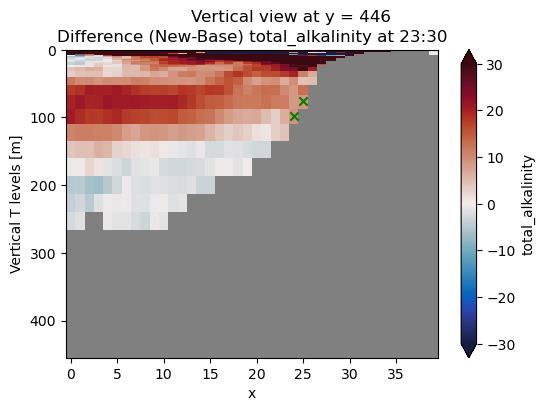

In [104]:
verticalview(long_run_may_16, alkalinity_run_may_16, 'total_alkalinity', 23, 446, 30)

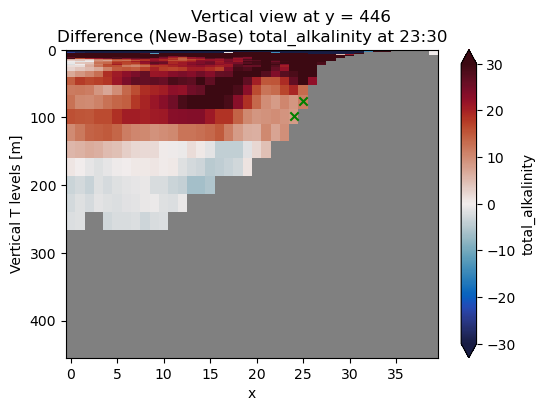

In [105]:
verticalview(long_run_may_31, alkalinity_run_may_31, 'total_alkalinity', 23, 446, 30)

In [106]:
def vertical_view_x(base, new, field, it, dep, dvmax):
    fig, axs = plt.subplots(1, 1, figsize=(6, 4))
    iz = 30  # width of domain plotted
    
    (new[field][it, :, 400+iz:500-iz, dep]-
     base[field][it, :, 400+iz:500-iz, dep]).where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs, cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs.set_title(f'Difference (New-Base) {field} at {it}:30')

    fig.suptitle(f'Vertical view at x = {dep}')

    if dep == 304:
        axs.scatter(447 - 430, 121, marker = 'x', color = 'g')
        axs.scatter(446 - 430, 98, marker = 'x', color = 'g')
    
    else:
        axs.scatter(447 - 430, 98, marker = 'x', color = 'g')
        axs.scatter(446 - 430, 76, marker = 'x', color = 'g')

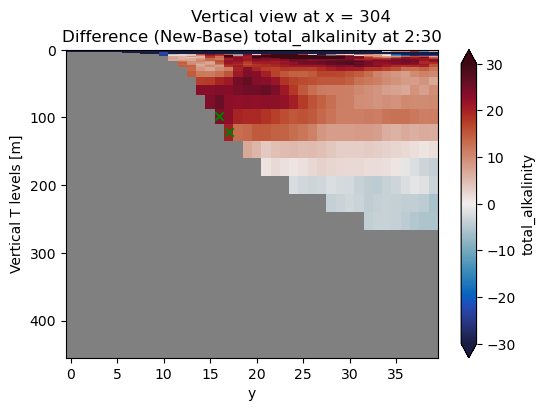

In [107]:
vertical_view_x(long_run_may_01, alkalinity_run_may_01, 'total_alkalinity', 2, 304, 30)

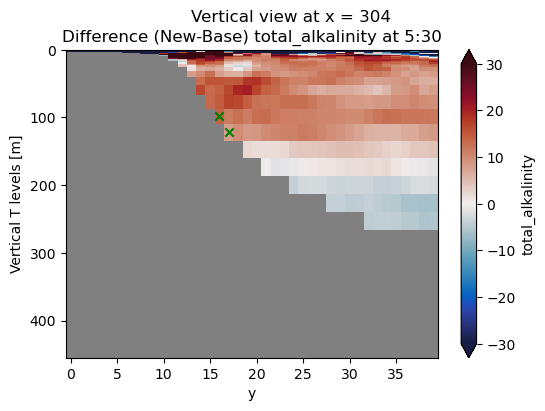

In [108]:
vertical_view_x(long_run_may_01, alkalinity_run_may_01, 'total_alkalinity', 5, 304, 30)

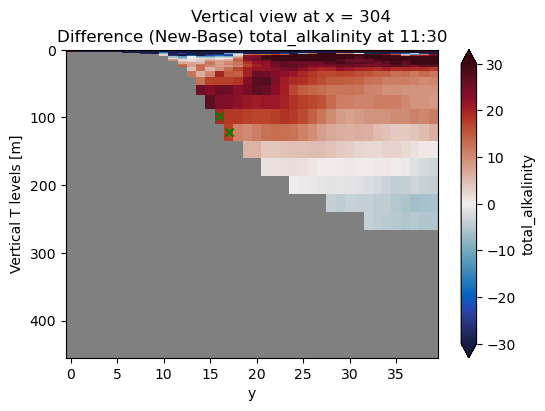

In [109]:
vertical_view_x(long_run_may_01, alkalinity_run_may_01, 'total_alkalinity', 11, 304, 30)

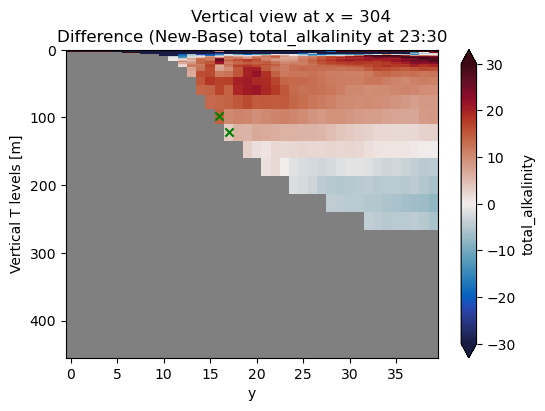

In [110]:
vertical_view_x(long_run_may_01, alkalinity_run_may_01, 'total_alkalinity', 23, 304, 30)

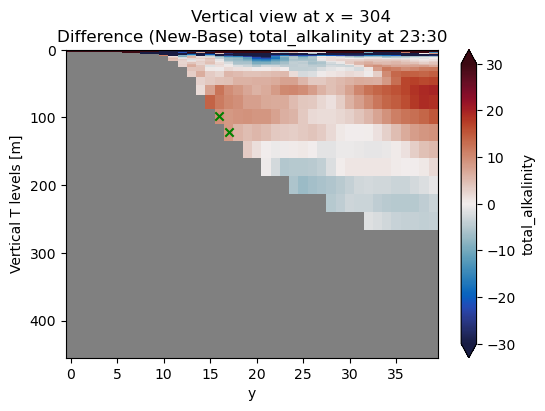

In [111]:
vertical_view_x(long_run_may_03, alkalinity_run_may_03, 'total_alkalinity', 23, 304, 30)

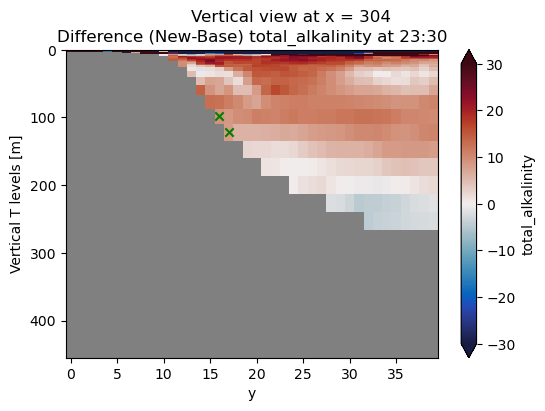

In [112]:
vertical_view_x(long_run_may_06, alkalinity_run_may_06, 'total_alkalinity', 23, 304, 30)

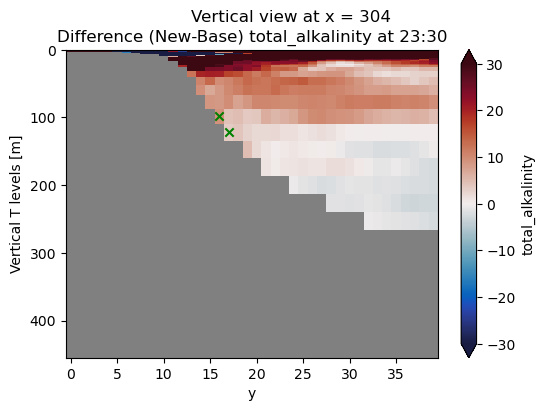

In [113]:
vertical_view_x(long_run_may_16, alkalinity_run_may_16, 'total_alkalinity', 23, 304, 30)

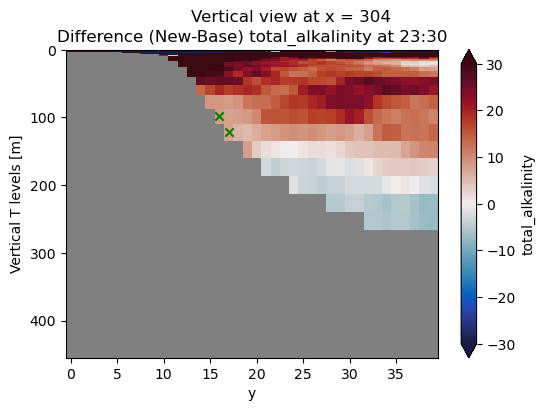

In [114]:
vertical_view_x(long_run_may_31, alkalinity_run_may_31, 'total_alkalinity', 23, 304, 30)